In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bussiness_dataset.csv')
df

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City Code,Order Priority Code,Latitude,Longtitude
0,1,Watch,Electronics,12652.30,4,Easypaisa,1/1/2023,50609.20,January,0.0,1.0,2.0,1.0,0.0
1,2,Bag,Fashion,20053.64,2,Credit Card,2/1/2023,40107.28,January,0.1,1.0,2.0,1.0,0.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,3/1/2023,26548.34,January,0.1,1.0,2.0,1.0,0.0
3,4,Bag,Electronics,15332.08,1,COD,4/1/2023,15332.08,January,0.1,1.0,2.0,1.0,0.0
4,5,Bag,Accessories,23165.07,1,Debit Card,5/1/2023,23165.07,January,0.0,1.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,4,Bag,Electronics,15332.08,1,COD,4/1/2023,15332.08,January,0.1,1.0,2.0,1.0,0.0
502,18,Headphones,Electronics,14085.56,2,Debit Card,18/01/2023,28171.12,January,0.0,1.0,2.0,1.0,0.0
503,19,Laptop,Accessories,53657.14,4,Debit Card,19/01/2023,214628.56,January,0.1,1.0,2.0,1.0,0.0
504,20,Watch,Fashion,74385.39,4,Credit Card,20/01/2023,297541.56,January,0.0,1.0,2.0,1.0,0.0


In [3]:
df.shape

(506, 14)

In [4]:
df.shape[0]

506

In [5]:
df.shape[1]

14

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             506 non-null    int64  
 1   product              506 non-null    object 
 2   category             506 non-null    object 
 3   price                506 non-null    float64
 4   quantity             506 non-null    int64  
 5   payment_method       506 non-null    object 
 6   date                 506 non-null    object 
 7   total                506 non-null    float64
 8   Month                506 non-null    object 
 9   Discount             506 non-null    float64
 10  City Code            491 non-null    float64
 11  Order Priority Code  487 non-null    float64
 12  Latitude             506 non-null    float64
 13  Longtitude           506 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 55.5+ KB


In [7]:
df.isnull().sum()

order_id                0
product                 0
category                0
price                   0
quantity                0
payment_method          0
date                    0
total                   0
Month                   0
Discount                0
City Code              15
Order Priority Code    19
Latitude                0
Longtitude              0
dtype: int64

In [8]:
df.dtypes

order_id                 int64
product                 object
category                object
price                  float64
quantity                 int64
payment_method          object
date                    object
total                  float64
Month                   object
Discount               float64
City Code              float64
Order Priority Code    float64
Latitude               float64
Longtitude             float64
dtype: object

In [9]:
df = df.drop(['Latitude', 'Longtitude'], axis=1)
df.head(0)

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City Code,Order Priority Code


In [10]:
df = df.rename(columns = {'City Code':'City'})

In [11]:
df = df.rename(columns = {'Order Priority Code':'Order Priority'})
df.head(0)

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority


In [12]:
df.duplicated().sum()

6

In [13]:
df = df.drop_duplicates()
df

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority
0,1,Watch,Electronics,12652.30,4,Easypaisa,1/1/2023,50609.20,January,0.00,1.0,2.0
1,2,Bag,Fashion,20053.64,2,Credit Card,2/1/2023,40107.28,January,0.10,1.0,2.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,3/1/2023,26548.34,January,0.10,1.0,2.0
3,4,Bag,Electronics,15332.08,1,COD,4/1/2023,15332.08,January,0.10,1.0,2.0
4,5,Bag,Accessories,23165.07,1,Debit Card,5/1/2023,23165.07,January,0.00,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Watch,Electronics,66152.43,2,JazzCash,10/5/2024,132304.86,May,0.65,4.0,1.0
496,497,Laptop,Electronics,10745.15,2,Easypaisa,11/5/2024,21490.30,May,0.70,4.0,1.0
497,498,Laptop,Electronics,27141.95,1,JazzCash,12/5/2024,27141.95,May,0.70,4.0,1.0
498,499,Bag,Fashion,59608.91,3,Credit Card,13/05/2024,178826.73,May,0.80,4.0,1.0


In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [15]:
df

,order_id,product,category,price,quantity,payment_method,date,total,Month,Discount,City,Order Priority
0,1,Watch,Electronics,12652.30,4,Easypaisa,1/1/2023,50609.20,January,0.00,1.0,2.0
1,2,Bag,Fashion,20053.64,2,Credit Card,2/1/2023,40107.28,January,0.10,1.0,2.0
2,3,Shoes,Fashion,13274.17,2,JazzCash,3/1/2023,26548.34,January,0.10,1.0,2.0
3,4,Bag,Electronics,15332.08,1,COD,4/1/2023,15332.08,January,0.10,1.0,2.0
4,5,Bag,Accessories,23165.07,1,Debit Card,5/1/2023,23165.07,January,0.00,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Watch,Electronics,66152.43,2,JazzCash,10/5/2024,132304.86,May,0.65,4.0,1.0
496,497,Laptop,Electronics,10745.15,2,Easypaisa,11/5/2024,21490.30,May,0.70,4.0,1.0
497,498,Laptop,Electronics,27141.95,1,JazzCash,12/5/2024,27141.95,May,0.70,4.0,1.0
498,499,Bag,Fashion,59608.91,3,Credit Card,13/05/2024,178826.73,May,0.80,4.0,1.0


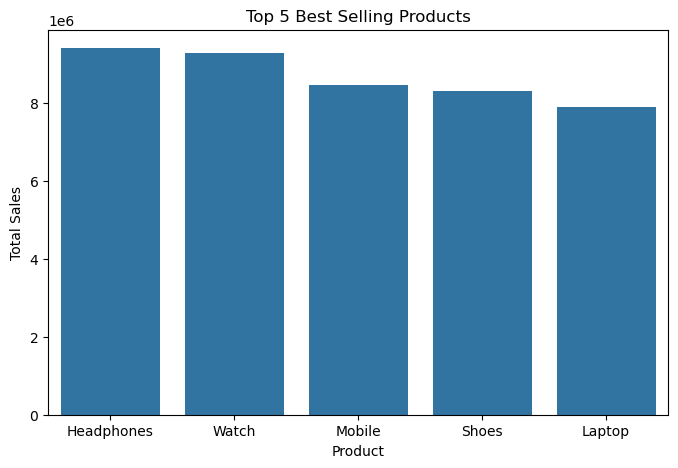

In [16]:
top_products = df.groupby("product")["total"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Best Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()


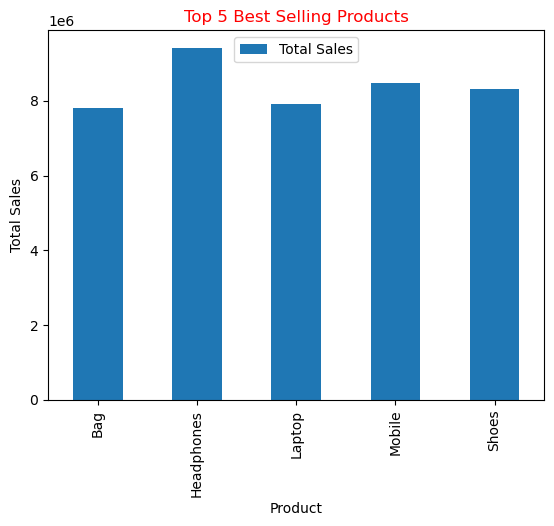

In [17]:
df1 = df.groupby('product')['total'].sum().head(5).reset_index()

ax = df1.plot(kind='bar', x='product', y='total', legend=True)

#ax.bar_label(ax.containers[0], labels=df1['total'].map('{:.2f}'.format))

ax.legend(['Total Sales'], loc='upper center')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 5 Best Selling Products', color='red')
plt.show()


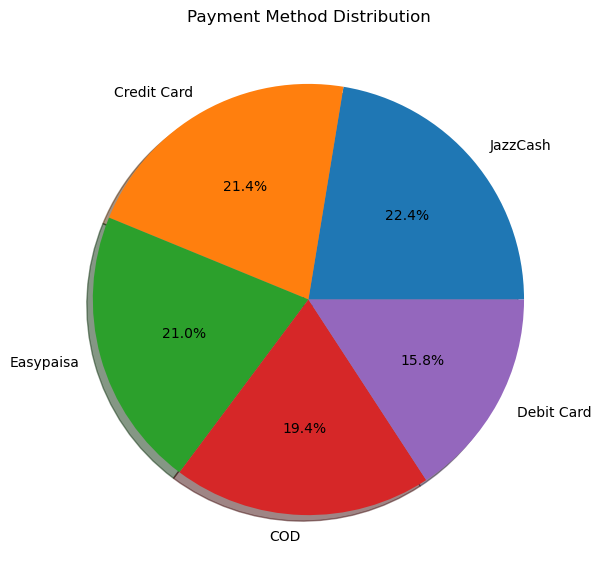

In [18]:
df2 = df["payment_method"].value_counts()

plt.figure(figsize=(13,7))
plt.pie(df2.values, labels=df2.index, autopct='%1.1f%%', shadow=True)  
plt.title("Payment Method Distribution")
plt.show()



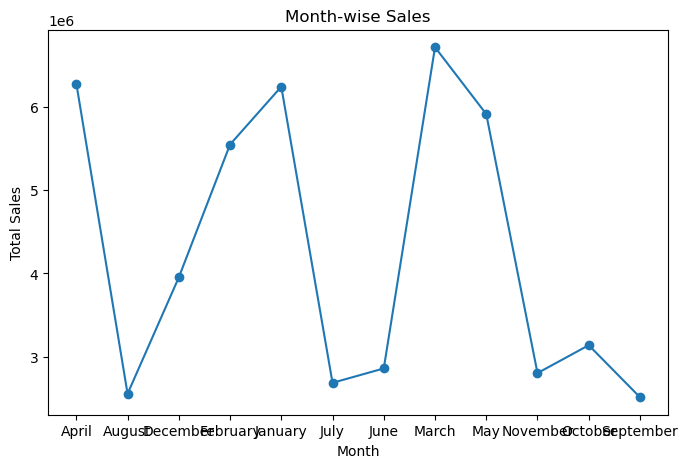

In [19]:
month_sales = df.groupby("Month")["total"].sum()

plt.figure(figsize=(8,5))
plt.plot(month_sales.index, month_sales.values, marker='o')
plt.title("Month-wise Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


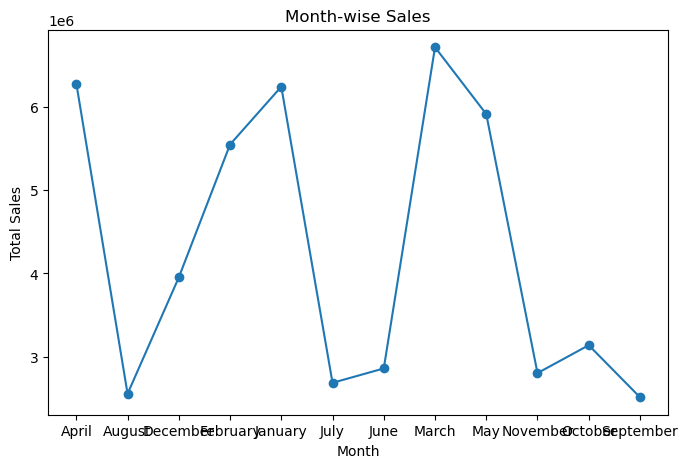

In [24]:
import matplotlib.pyplot as plt

month_sales = df.groupby("Month")["total"].sum()

plt.figure(figsize=(8,5))
plt.plot(month_sales.index, month_sales.values, marker='o')
plt.title("Month-wise Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

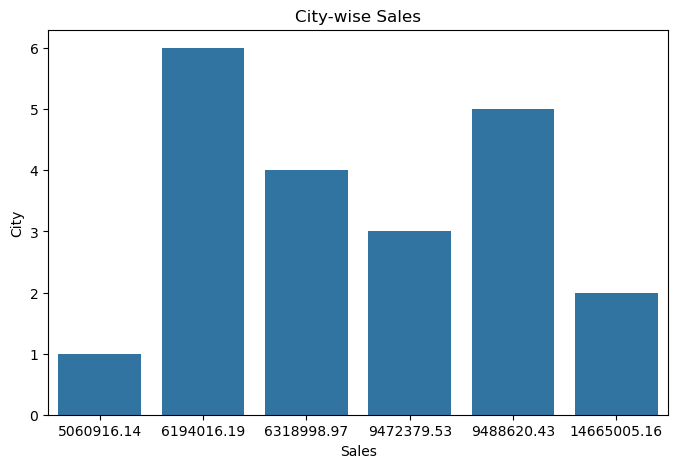

In [25]:
city_sales = df.groupby("City")["total"].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=city_sales.values, y=city_sales.index)
plt.title("City-wise Sales")
plt.xlabel("Sales")
plt.ylabel("City")
plt.show()


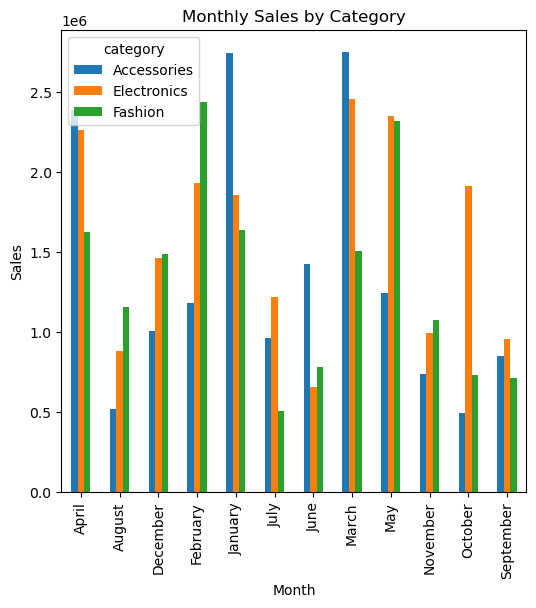

In [30]:
category_month = df.groupby(["Month", "category"])["total"].sum().unstack()

category_month.plot(kind='bar', figsize=(6,6))
plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

In [ ]:
Conclusion:

Laptops and Mobiles are the top-selling products. 
Sales are highest in March, July, August, and December.
Peshawar and Quetta show strong sales performance.
Easypaisa and JazzCash are the most used payment methods.
These insights help improve marketing, stock planning, and regional targeting.